<a href="https://colab.research.google.com/github/Tendo4/Car-Insurance/blob/main/Tendo_Elisha_Project_2_part_2_core_updated_%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car Insurance Data

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow import keras
from keras.layers import Dense
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor # NEW
from sklearn import set_config
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas.core.base import value_counts
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
set_config(transform_output='pandas')

In [447]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [448]:
## Loading data about car insurance
fpath ="/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/Car_Insurance_Claim.csv"
df = pd.read_csv(fpath)
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [449]:
df.shape

(10000, 19)

-The dataset is sourced from https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

-The data is about the annual insurance data of the company

-The target is outcome

-One row represents a person

-This is a classification problem

-It has 10000 rows

-It has 19 columns

##Data Cleaning

In [450]:
##datatypes
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

####Duplicates

In [451]:
#checking for duplicates
duplicated_rows=df.duplicated()
duplicated_rows.sum()

0

####Missing values

In [452]:
#identifying missing values
null=df.isna()
null_sum=null.sum()
null_sum

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [453]:
# Use .select_dtypes to view only object columns
cat_cols=df.select_dtypes(include='object')
cat_cols

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
0,65+,female,majority,0-9y,high school,upper class,after 2015,sedan
1,16-25,male,majority,0-9y,none,poverty,before 2015,sedan
2,16-25,female,majority,0-9y,high school,working class,before 2015,sedan
3,16-25,male,majority,0-9y,university,working class,before 2015,sedan
4,26-39,male,majority,10-19y,none,working class,before 2015,sedan
...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,before 2015,sedan
9996,26-39,female,majority,10-19y,none,middle class,after 2015,sedan
9997,26-39,male,majority,0-9y,high school,middle class,before 2015,sedan
9998,26-39,female,majority,10-19y,high school,poverty,before 2015,sedan


In [454]:
# Check the nunique for just the object cols inorder to identify columns tha need to be dropped
cat_cols.nunique()

AGE                   4
GENDER                2
RACE                  2
DRIVING_EXPERIENCE    4
EDUCATION             3
INCOME                4
VEHICLE_YEAR          2
VEHICLE_TYPE          2
dtype: int64

In [455]:
# Use .select_dtypes to view only object columns
num_cols=df.select_dtypes(include='number')
num_cols

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0
1,750365,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0
2,199901,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0
3,478866,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0
4,731664,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,0.582787,1.0,0.0,0.0,10238,16000.0,0,0,1,0.0
9996,910346,0.522231,1.0,0.0,1.0,32765,NaN,1,0,0,0.0
9997,468409,0.470940,1.0,0.0,1.0,10238,14000.0,0,0,0,0.0
9998,903459,0.364185,0.0,0.0,1.0,10238,13000.0,2,0,1,1.0


#### define X and Y features

In [456]:
# Define features (X) and target (y).
y = df['OUTCOME']
X = df.drop(columns='OUTCOME')

In [457]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0
4375,208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0
6698,318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3
9805,559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0
1101,555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0


#### Define groups of features using lists:



In [458]:
categorical_cols = X_train.select_dtypes('object').columns
categorical_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [459]:
#numerical columns
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')

####imputing categorical columns

In [460]:
# Instantaite and fit the imputer for categorical features
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [461]:
# Transform the training and test categorical features and save as new vars
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

# confirm no null values remaining
X_train_cat_imputed.isna().sum()

AGE                   0
GENDER                0
RACE                  0
DRIVING_EXPERIENCE    0
EDUCATION             0
INCOME                0
VEHICLE_YEAR          0
VEHICLE_TYPE          0
dtype: int64

####Imputing numeric columns

In [462]:
# Instantaite and fit the imputer for numeric features
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [463]:
# Transform the training and test numeric features and save as new vars
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

# confirm no null values remaining
X_train_num_imputed.isna().sum()

ID                     0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
dtype: int64

####One Hot encoding

In [464]:
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [465]:
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(X_train_cat_imputed)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [466]:
# Transform the training data
X_train_cat_encoded = ohe_encoder.transform(X_train_cat_imputed)
X_train_cat_encoded.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
4901,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4375,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6698,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9805,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1101,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [467]:
# Transform the testing data
X_test_cat_encoded = ohe_encoder.transform(X_test_cat_imputed)
X_test_cat_encoded.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
6252,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4684,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1731,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4742,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4521,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


###Standard scaler for numeric columns

In [468]:
# instantiate standard scaler and fit on training data
scaler = StandardScaler()
scaler.fit(X_train_num_imputed)

StandardScaler()

In [469]:
# Apply the scaling transformation
X_train_num_scaled = scaler.transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)
X_train_num_scaled.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4901,0.331565,1.367938,0.660062,1.000533,0.674880,3.867776,0.098334,-0.659296,-0.432581,-0.643278
4375,-1.015047,-1.702804,0.660062,-0.999467,-1.481745,0.694321,0.098334,-0.659296,-0.432581,-0.643278
6698,-0.632931,0.063118,0.660062,1.000533,0.674880,-0.510486,0.098334,-0.659296,-0.432581,1.147363
9805,0.198738,-0.477776,0.660062,-0.999467,-1.481745,-0.510486,3.099366,0.229004,-0.432581,-0.643278
1101,0.185106,-2.802891,0.660062,1.000533,-1.481745,-0.510486,-0.651924,-0.659296,-0.432581,-0.643278


In [470]:
# check describe() for pre-scaling data
X_train_num_imputed.describe().round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,7500.00,7500.00,7500.00,7500.0,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,501772.84,0.52,0.70,0.5,0.69,19782.86,11737.87,1.48,0.24,1.08
std,289049.11,0.13,0.46,0.5,0.46,18698.85,2665.93,2.25,0.56,1.68
min,101.00,0.06,0.00,0.0,0.00,10238.00,2000.00,0.00,0.00,0.00
25%,253970.75,0.43,0.00,0.0,0.00,10238.00,10000.00,0.00,0.00,0.00
50%,501858.00,0.53,1.00,0.0,1.00,10238.00,12000.00,0.00,0.00,0.00
75%,752031.25,0.61,1.00,1.0,1.00,32765.00,13000.00,2.00,0.00,2.00
max,999976.00,0.96,1.00,1.0,1.00,92101.00,22000.00,22.00,6.00,15.00


In [471]:
X_train_num_scaled.describe().round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,7500.00,7500.00,7500.00,7500.0,7500.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,-0.00,0.00,0.00,0.0,-0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-3.51,-1.52,-1.0,-1.48,-0.51,-3.65,-0.66,-0.43,-0.64
25%,-0.86,-0.66,-1.52,-1.0,-1.48,-0.51,-0.65,-0.66,-0.43,-0.64
50%,0.00,0.06,0.66,-1.0,0.67,-0.51,0.10,-0.66,-0.43,-0.64
75%,0.87,0.69,0.66,1.0,0.67,0.69,0.47,0.23,-0.43,0.55
max,1.72,3.42,0.66,1.0,0.67,3.87,3.85,9.11,10.25,8.31


###Categorical and numeric pipelines

In [472]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [473]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [474]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', numeric_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
        'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [475]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, cat_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
        'VEHICLE_YEAR', 'VEHICLE_TYPE'],
       dtype='object'))

In [476]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [477]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [478]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
4901,0.331565,1.375201,0.660062,1.000533,0.674880,3.867776,6.826978e-16,-0.659296,-0.432581,-0.643278,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4375,-1.015047,-1.696215,0.660062,-0.999467,-1.481745,0.694321,1.085747e-01,-0.659296,-0.432581,-0.643278,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6698,-0.632931,0.000000,0.660062,1.000533,0.674880,-0.510486,6.826978e-16,-0.659296,-0.432581,1.147363,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9805,0.198738,-0.470918,0.660062,-0.999467,-1.481745,-0.510486,3.111111e+00,0.229004,-0.432581,-0.643278,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1101,0.185106,-2.796544,0.660062,1.000533,-1.481745,-0.510486,-6.420595e-01,-0.659296,-0.432581,-0.643278,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


###Univariate  visuals

Univariate plots for numerical cols

In [479]:
#value_counts(df.Survived) for passengers who survived
from pandas.core.base import value_counts

k=value_counts(df.OUTCOME)
k

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

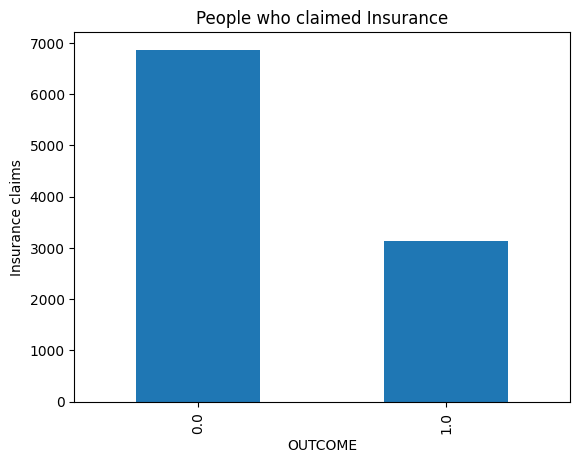

In [480]:
#plot for counts of people who claimed their insurance
ax=k.plot(kind='bar')
ax.set_xlabel('OUTCOME');
ax.set_ylabel('Insurance claims');
ax.set_title('People who claimed Insurance');

In [481]:
#histogram for Credit Score
df["CREDIT_SCORE"].head()

0    0.629027
1    0.357757
2    0.493146
3    0.206013
4    0.388366
Name: CREDIT_SCORE, dtype: float64

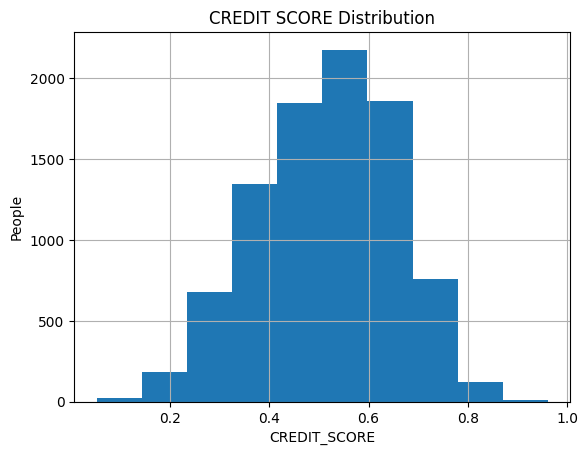

In [482]:
#  histogram of the distribution of Credit Score
ax=df['CREDIT_SCORE'].hist()
ax.set_title('CREDIT SCORE Distribution')
ax.set_xlabel('CREDIT_SCORE')
ax.set_ylabel('People');

In [483]:
#histogram for Vehicle Ownership
df["VEHICLE_OWNERSHIP"].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: VEHICLE_OWNERSHIP, dtype: float64

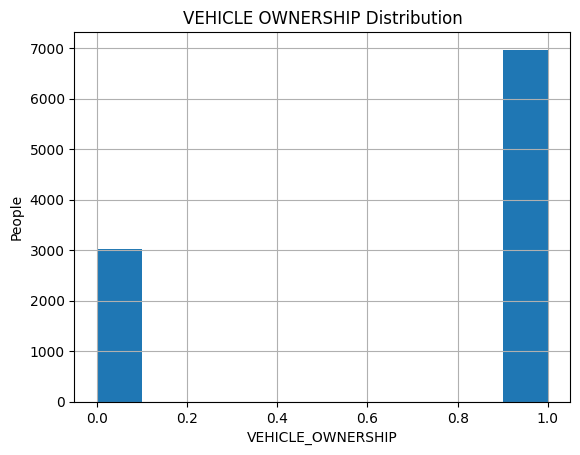

In [484]:
#  histogram of the distribution of Vehicle ownership
ax=df['VEHICLE_OWNERSHIP'].hist()
ax.set_title('VEHICLE OWNERSHIP Distribution')
ax.set_xlabel('VEHICLE_OWNERSHIP')
ax.set_ylabel('People');

In [485]:
#histogram for MARRIED
df["MARRIED"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MARRIED, dtype: float64

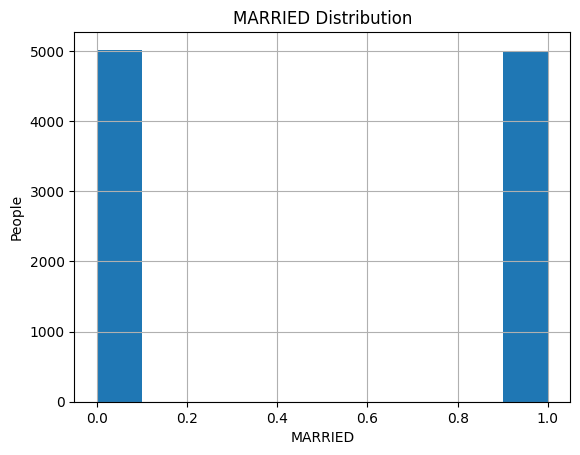

In [486]:
#  histogram of the distribution of MARRIED
ax=df['MARRIED'].hist()
ax.set_title('MARRIED Distribution')
ax.set_xlabel('MARRIED')
ax.set_ylabel('People');

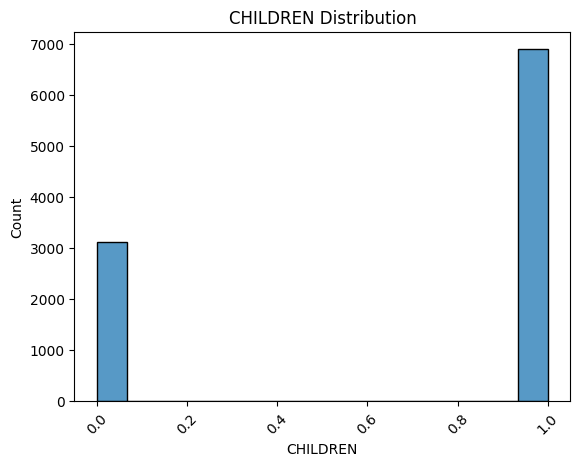

In [487]:
# Use seaborn's histplot function to show a distribution for the childrens column
ax = sns.histplot(data=df, x="CHILDREN")
ax.set_title('CHILDREN Distribution')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



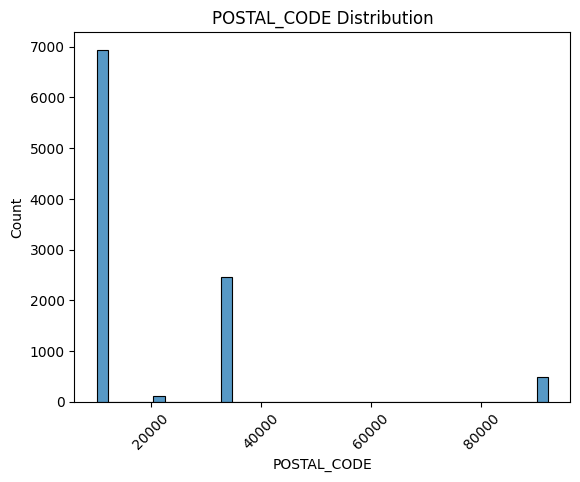

In [488]:
# Use seaborn's histplot function to show a distribution for the POSTAL_CODE column
ax = sns.histplot(data=df, x="POSTAL_CODE")
ax.set_title('POSTAL_CODE Distribution')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



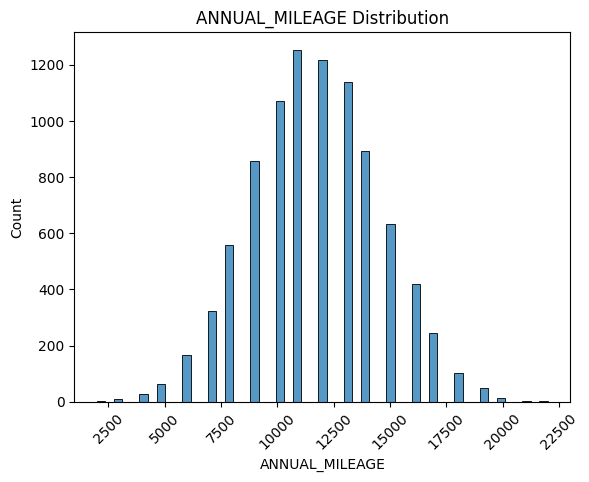

In [489]:
# Use seaborn's histplot function to show a distribution for the ANNUAL_MILEAGE column
ax = sns.histplot(data=df, x="ANNUAL_MILEAGE")
ax.set_title('ANNUAL_MILEAGE Distribution')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



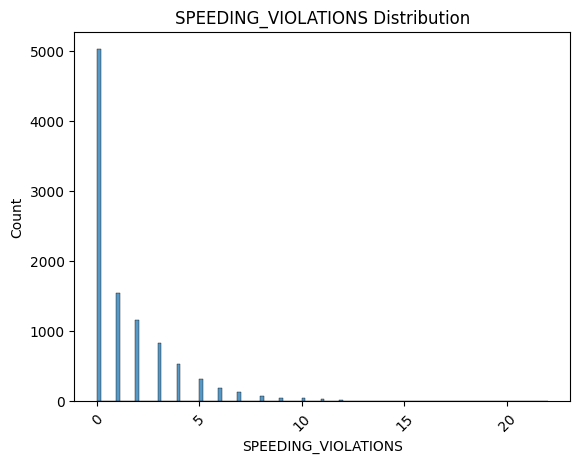

In [490]:
# Use seaborn's histplot function to show a distribution for the SPEEDING_VIOLATIONS column
ax = sns.histplot(data=df, x="SPEEDING_VIOLATIONS")
ax.set_title('SPEEDING_VIOLATIONS Distribution')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



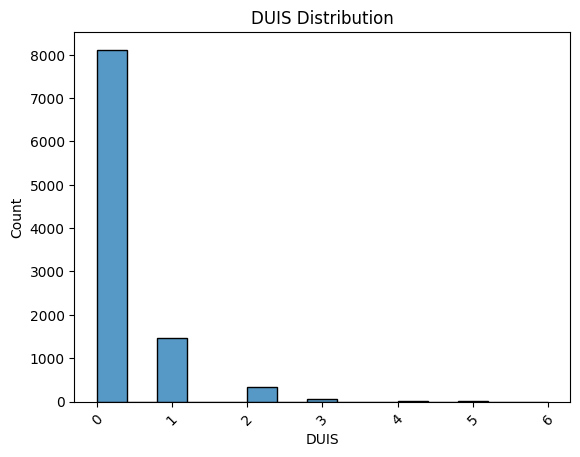

In [491]:
# Use seaborn's histplot function to show a distribution for the DUIS column
ax = sns.histplot(data=df, x="DUIS")
ax.set_title('DUIS Distribution')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



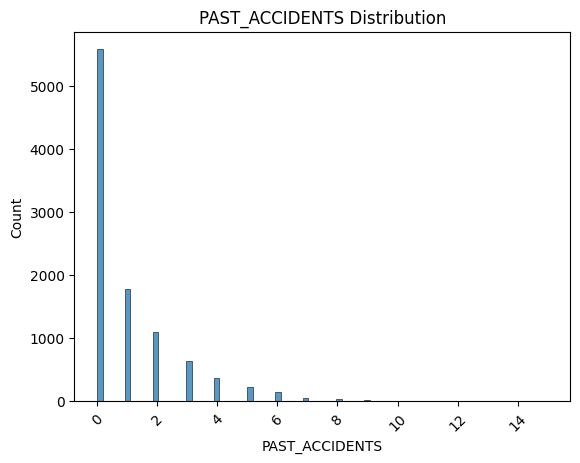

In [492]:
# Use seaborn's histplot function to show a distribution for the PAST_ACCIDENTS column
ax = sns.histplot(data=df, x="PAST_ACCIDENTS")
ax.set_title('PAST_ACCIDENTS Distribution')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);



Univariate plots for cat cols

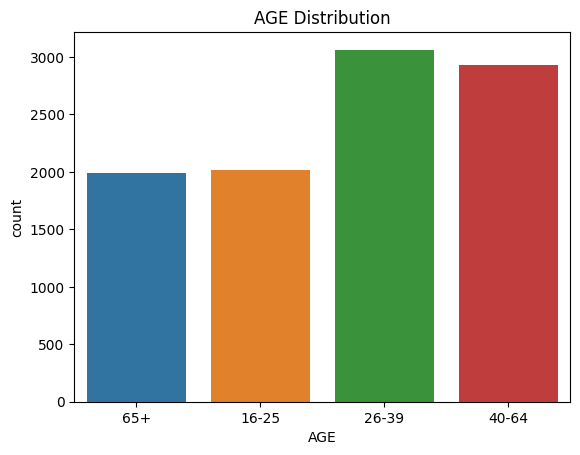

In [493]:
# Seaborn countplot
ax = sns.countplot(data=df, x="AGE")
ax.set_title('AGE Distribution');


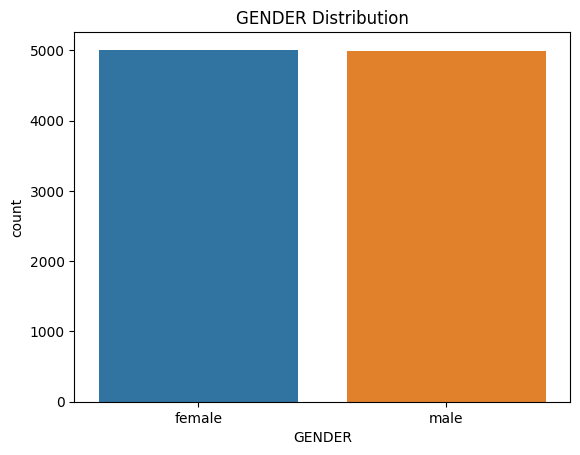

In [494]:
# Seaborn countplot
ax = sns.countplot(data=df, x="GENDER")
ax.set_title('GENDER Distribution');


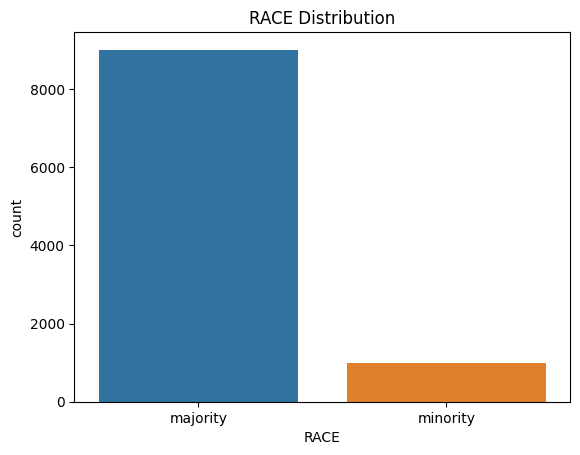

In [495]:
# Seaborn countplot for RACE
ax = sns.countplot(data=df, x="RACE")
ax.set_title('RACE Distribution');


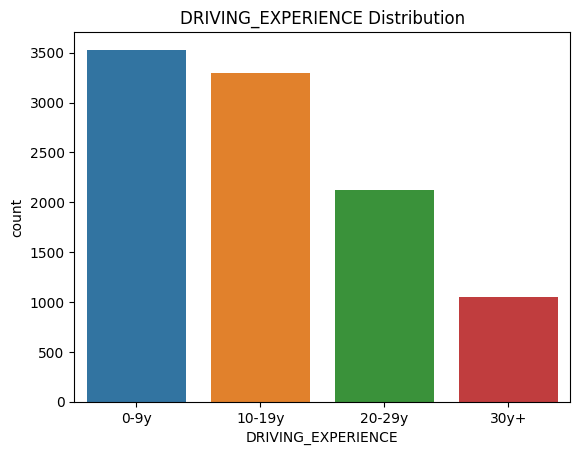

In [496]:
# Seaborn countplot for DRIVING_EXPERIENCE
ax = sns.countplot(data=df, x="DRIVING_EXPERIENCE")
ax.set_title('DRIVING_EXPERIENCE Distribution');


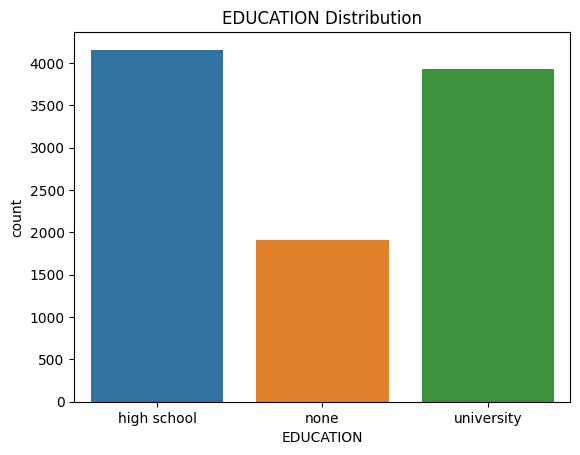

In [497]:
# Seaborn countplot for EDUCATION
ax = sns.countplot(data=df, x="EDUCATION")
ax.set_title('EDUCATION Distribution');


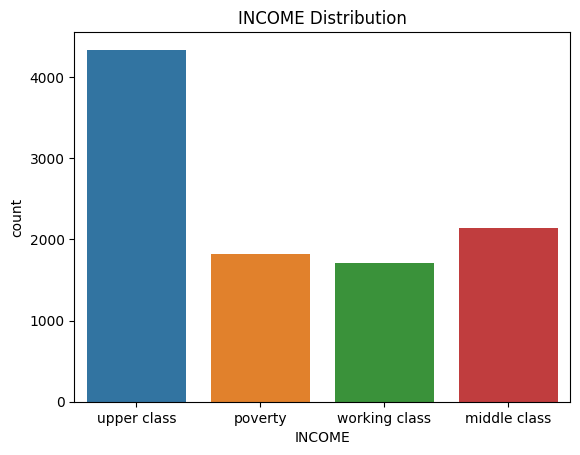

In [498]:
# Seaborn countplot for INCOME
ax = sns.countplot(data=df, x="INCOME")
ax.set_title('INCOME Distribution');


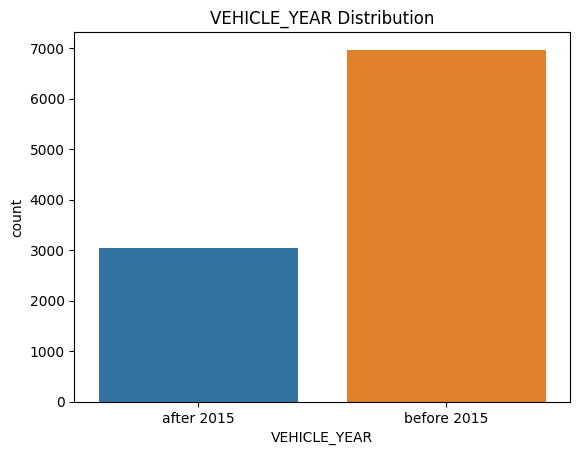

In [499]:
# Seaborn countplot for VEHICLE_YEAR
ax = sns.countplot(data=df, x="VEHICLE_YEAR")
ax.set_title('VEHICLE_YEAR Distribution');


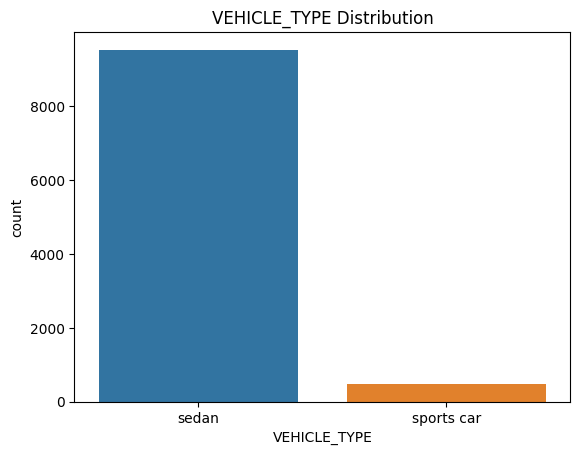

In [500]:
# Seaborn countplot for VEHICLE_TYPE
ax = sns.countplot(data=df, x="VEHICLE_TYPE")
ax.set_title('VEHICLE_TYPE Distribution');



#### Explore Vehicle Type vs. Outcome

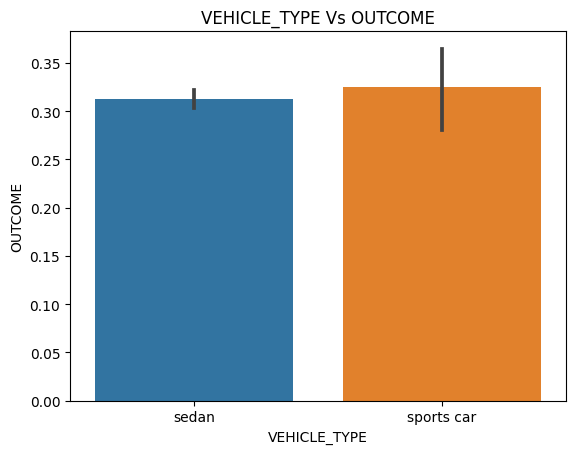

In [501]:
# Make a barplot of VEHICLE_TYPE vs. OUTCOME

ax = sns.barplot(data=df, x='VEHICLE_TYPE', y="OUTCOME")
ax.set_title('VEHICLE_TYPE Vs OUTCOME');

The above visual shows us that people who own sports cars are more likely to claim for insurance.
This could be due to the fact that sports cars are more likely to cause accidents because they are fast and move at high speeds and are more likely to cause accidents


#### Explore Driving Expirience vs. Outcome

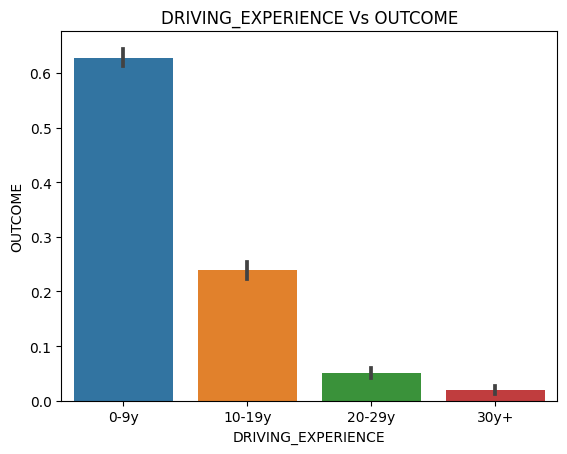

In [502]:
# Make a barplot of DRIVING_EXPERIENCE vs. OUTCOME

ax = sns.barplot(data=df, x='DRIVING_EXPERIENCE', y="OUTCOME")
ax.set_title('DRIVING_EXPERIENCE Vs OUTCOME');

The above visual shows us that as the drivers expirience increases , the outcome reduces .
This means that more expirienced drivers are less likely to make insurance claims

###logreg, Random forest /KNN Starts HERE

###KNN

In [503]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [504]:
# Instantiate default KNN
knn = KNeighborsClassifier()

In [505]:
# Define KNN model pipeline
knn_pipe = make_pipeline(col_transformer, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipe...leimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

###Evaluate

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5144
         1.0       0.80      0.76      0.78      2356

    accuracy                           0.86      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.86      0.86      0.86      7500



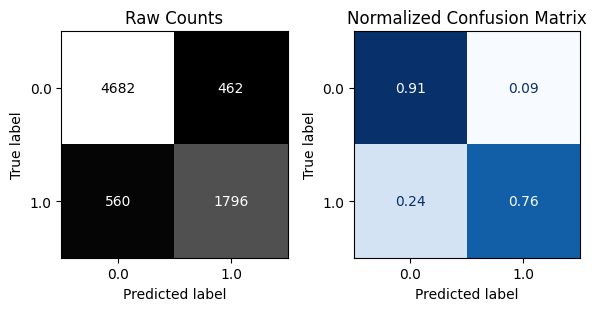


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1723
         1.0       0.71      0.69      0.70       777

    accuracy                           0.82      2500
   macro avg       0.79      0.78      0.78      2500
weighted avg       0.82      0.82      0.82      2500



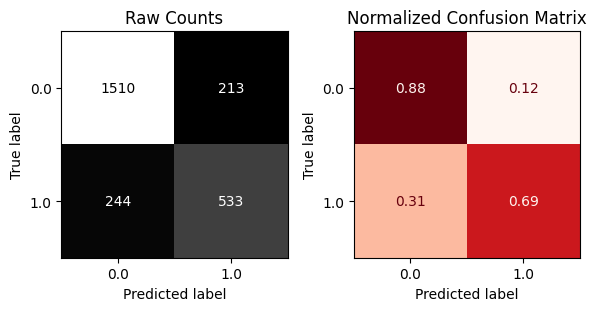

In [506]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

###Finding Best K

In [507]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [508]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
          'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
          'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
        

In [509]:
# Create param grid
params={'kneighborsclassifier__n_neighbors': nneighbors_list}

In [510]:
# Instaniate GridSearchCV
gs = GridSearchCV(knn_pipe, params, verbose=True, n_jobs=-1, scoring='recall_macro',cv=3,)
# Fit gs on training data
gs.fit(X_train, y_train)
# Obtain best param value for K
gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'kneighborsclassifier__n_neighbors': 21}

###Logistic Regression

###Logistic Regression

In [511]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [512]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=500, random_state=42)
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train_processed, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5144
         1.0       0.77      0.72      0.75      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.84      0.84      0.84      7500



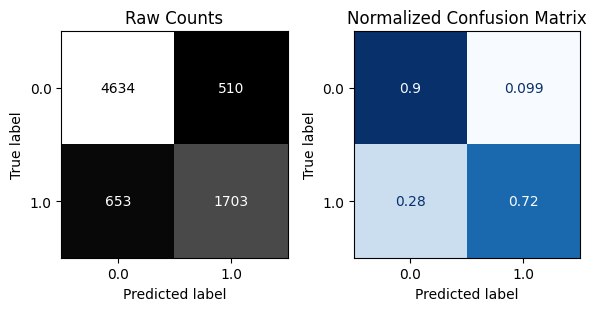


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1723
         1.0       0.76      0.71      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



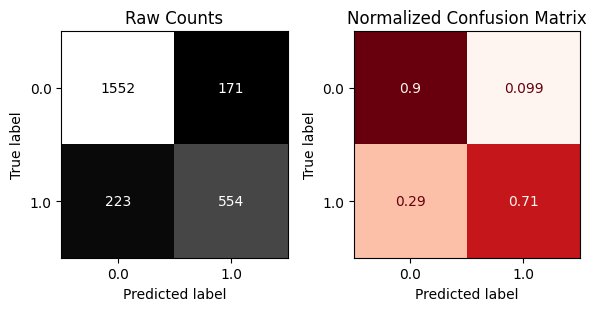

In [513]:
# Evaluate the default model
evaluate_classification(logreg_pipe, X_train_processed, y_train, X_test_processed, y_test)



###L1 Tunning

In [514]:
# Create the logreg pipe with L1 regularization
logreg_pipe = make_pipeline(scaler, LogisticRegression(penalty='l1',
                                                       random_state=42,
                                                       max_iter=500))
logreg_pipe.get_params()



{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(max_iter=500, penalty='l1', random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=500, penalty='l1', random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 500,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [515]:
# Remaking the model with solver='liblinear'
logreg_pipe = make_pipeline(scaler, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l1',
                                                       random_state=42))
# Define the param grid
params={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Create the GridSearchCV object with required args
gs = GridSearchCV(logreg_pipe, params, verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro',cv=3)
# Fit the gridsearch and display best params
gs.fit(X_train_processed, y_train)
print(f'Best Params: {gs.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'logisticregression__C': 0.1}


In [516]:
# Making a dataframe with cv_results_
cv_results = pd.DataFrame(gs.cv_results_)
# Save the train/test scores + value for C
scores = cv_results[['param_logisticregression__C','mean_train_score','mean_test_score']]
scores = scores.set_index('param_logisticregression__C')
scores



,mean_train_score,mean_test_score
param_logisticregression__C,,
0.0001,0.500000,0.500000
0.0010,0.758379,0.758377
0.0100,0.805923,0.805331
0.1000,0.813199,0.810904
1.0000,0.812417,0.808021
10.0000,0.812213,0.807923
100.0000,0.812098,0.807826
1000.0000,0.812050,0.807614


param_logisticregression__C
0.0001       0.500000
0.0010       0.758377
0.0100       0.805331
0.1000       0.810904
1.0000       0.808021
10.0000      0.807923
100.0000     0.807826
1000.0000    0.807614
Name: mean_test_score, dtype: float64


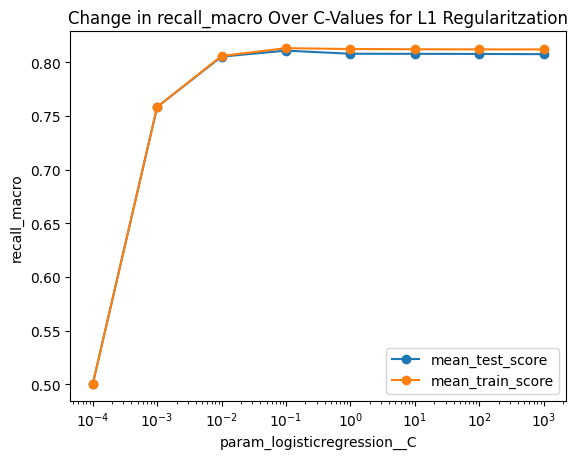

In [517]:
## Plot the training vs test scores vs. C
ax = scores.plot(y=['mean_test_score','mean_train_score'],
            style='o-',logx=True)
ax.set(ylabel=gs.scoring,
       title=f'Change in {gs.scoring} Over C-Values for L1 Regularitzation')
print(scores['mean_test_score'])



In [518]:
# We will be reproducing thie plot many times, so let's turn it into a short-term function
def plot_cv_results(gs, param_name='param_logisticregression__C', logx = True):
    # Making a dataframe with cv_results_
  cv_results = pd.DataFrame(gs.cv_results_)
  # Save the train/test scores with values for C
  scores = cv_results[[param_name,'mean_train_score','mean_test_score']]
  scores = scores.set_index(param_name)
  ## Plot the training vs test scores vs. C
  ax = scores.plot(y=['mean_test_score','mean_train_score'],
              style='o-',logx=logx)
  ax.set(ylabel=gs.scoring)
  print(scores['mean_test_score'])
  return ax



param_logisticregression__C
0.0001       0.500000
0.0010       0.758377
0.0100       0.805331
0.1000       0.810904
1.0000       0.808021
10.0000      0.807923
100.0000     0.807826
1000.0000    0.807614
Name: mean_test_score, dtype: float64


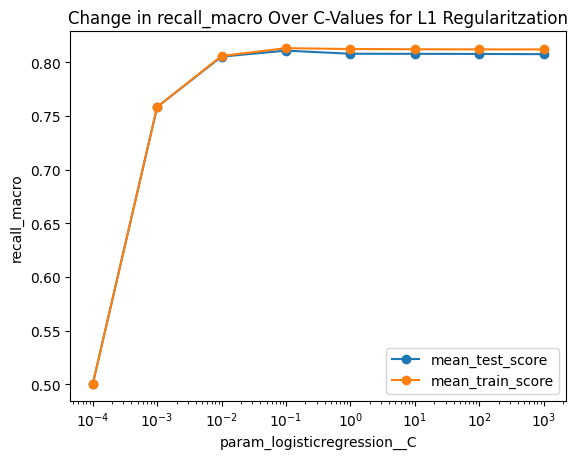

In [519]:
# Recreating the plot with our new function
ax = plot_cv_results(gs)
ax.set_title(f'Change in {gs.scoring} Over C-Values for L1 Regularitzation');


###L2 Tunning

In [520]:
# Making a logreg pipe that uses L2 regularization
logreg_pipe = make_pipeline(scaler, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l2',
                                                       random_state=42))
# Define the params and instantiate gridsearch
params={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gs = GridSearchCV(logreg_pipe, params,verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro',cv=3)
# Fit gridsearch and display best params
gs.fit(X_train_processed, y_train)
gs.best_params_



Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'logisticregression__C': 0.01}

param_logisticregression__C
0.0001       0.791037
0.0010       0.804844
0.0100       0.811924
0.1000       0.809064
1.0000       0.807808
10.0000      0.807826
100.0000     0.807826
1000.0000    0.807826
Name: mean_test_score, dtype: float64


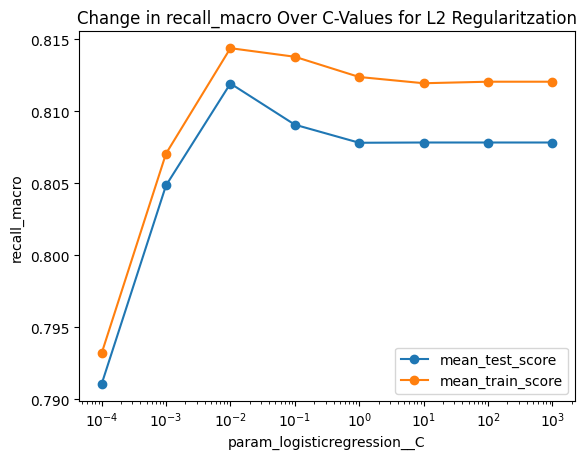

In [521]:
ax = plot_cv_results(gs)
ax.set_title(f'Change in {gs.scoring} Over C-Values for L2 Regularitzation');


###Elasticnet Regularization

In [522]:
# Making a logreg pipe that uses elasticnet regularization
logreg_pipe = make_pipeline(scaler, LogisticRegression(solver='saga', penalty='elasticnet', max_iter=2500, random_state=42))
# Define l1_ratio params
params={
    'logisticregression__l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    }
# Create and fit the gridsearch and display results
gs = GridSearchCV(logreg_pipe, params,verbose=True, n_jobs=-1,cv=3,
                  return_train_score=True,scoring='recall_macro')
gs.fit(X_train_processed, y_train)
gs.best_params_



Fitting 3 folds for each of 11 candidates, totalling 33 fits


{'logisticregression__l1_ratio': 0.3}

param_logisticregression__l1_ratio
0.0    0.807905
0.1    0.807905
0.2    0.808021
0.3    0.808215
0.4    0.808215
0.5    0.808215
0.6    0.808215
0.7    0.808215
0.8    0.808215
0.9    0.808003
1.0    0.807808
Name: mean_test_score, dtype: float64


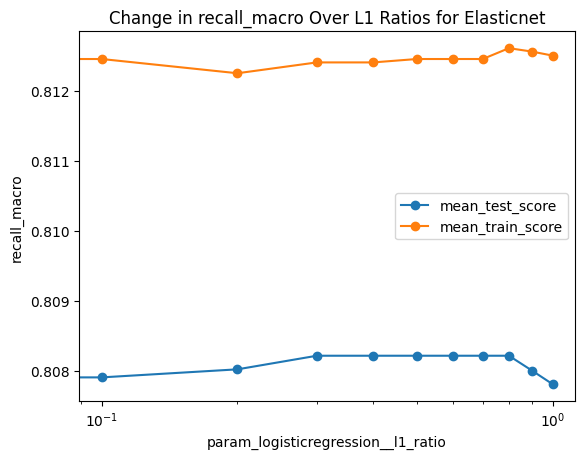

In [523]:
ax = plot_cv_results(gs, param_name='param_logisticregression__l1_ratio')
ax.set_title(f'Change in {gs.scoring} Over L1 Ratios for Elasticnet');



In [524]:
# Making a starter logreg pipeline
logreg_pipe = make_pipeline(scaler, LogisticRegression(max_iter=1000,
                                                       random_state=42))



In [525]:
# Params compatible with penality='elasticnet'
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
# Params compatible with penality='l1'
l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
# Params with no penality
none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'logisticregression__penalty' : [None]}
# Now make a list of the param dictionaries
param_grid = [l2_params, l1_params, elasticnet_params, none_params]





In [526]:
## Warning: this gridsearch may take 5-10 minutes to run!!
# Instantiate gridsearch
gs = GridSearchCV(logreg_pipe, param_grid, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')
# Fit the gs on the training data only
gs.fit(X_train_processed, y_train)
gs.best_params_


Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      5144
         1.0       0.76      0.74      0.75      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.82      0.82      7500
weighted avg       0.84      0.84      0.84      7500



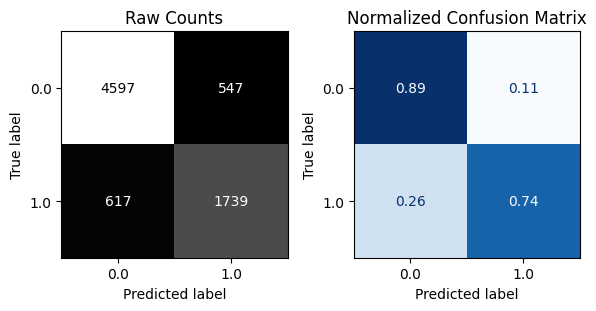


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1723
         1.0       0.76      0.72      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.82      2500
weighted avg       0.84      0.84      0.84      2500



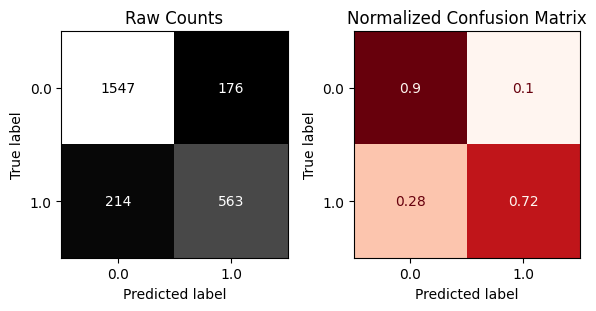

In [527]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train_processed, y_train, X_test_processed, y_test)


##Random Forests

In [528]:
# Instantiate and fit RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_processed, y_train)

# Obtain predictions
train_preds = rf_clf.predict(X_train_processed)
test_preds = rf_clf.predict(X_test_processed)

# Calculate classification accuracy
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)
print (f'The training accuracy is {train_score:.3f}.')
print (f'The testing accuracy is {test_score:.3f}.')

The training accuracy is 1.000.
The testing accuracy is 0.836.


In [529]:
# Define rf_clf model pipeline
rf_pipe = make_pipeline(col_transformer, rf_clf)
# Fit the model on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipe...
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



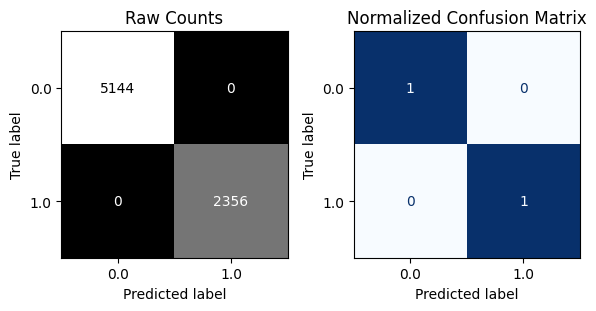


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1723
         1.0       0.77      0.68      0.72       777

    accuracy                           0.84      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.84      0.83      2500



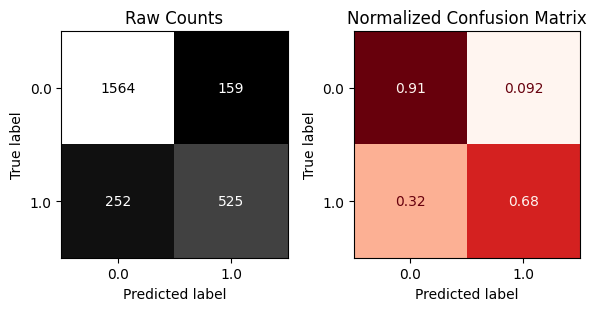

In [530]:
# Obtain evaluation metrics using custom function
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

In [531]:
#Get params
rf_clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [532]:
#fine tune
fine_tune_params={
    'max_depth':[2,4,8,16,32]
}

In [533]:
# Instantiate gridsearch
gscv = GridSearchCV(rf_clf, fine_tune_params, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')

In [534]:
# Fit the gs on the training data only
gscv.fit(X_train_processed, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 16, 32]},
             scoring='recall_macro', verbose=5)

In [535]:
#getting the best params
gscv.best_params_

{'max_depth': 8}

In [536]:
#finding the best model
best_model=gscv.best_estimator_

y_pred=best_model.predict(X_test_processed)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      5144
         1.0       0.80      0.75      0.77      2356

    accuracy                           0.86      7500
   macro avg       0.84      0.83      0.84      7500
weighted avg       0.86      0.86      0.86      7500



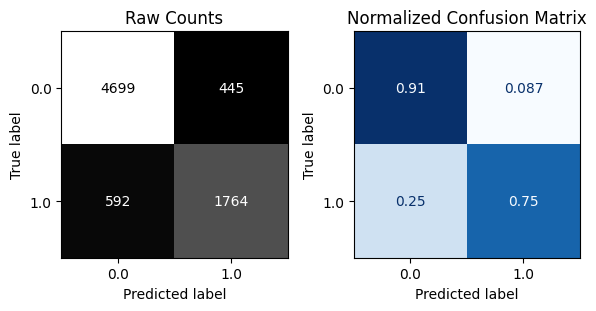


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1723
         1.0       0.78      0.71      0.74       777

    accuracy                           0.85      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.85      0.84      2500



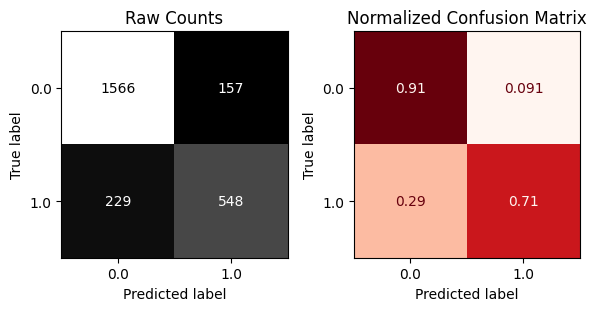

In [537]:
# Evalaute the best model

evaluate_classification(best_model, X_train_processed, y_train, X_test_processed, y_test)


###PCA

####Scaling

In [538]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_train_processed)



####Apply PCA

In [539]:
pca = PCA()
pca_df = pca.fit_transform(scaled_df)

In [540]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), pca)



In [541]:
# Fit on training data
transformer.fit(X_train_processed)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [542]:
# Transform the training data
X_train_processed = transformer.transform(X_train_processed)
# Transform the testing data
X_test_processed = transformer.transform(X_test_processed)


#### Model 1

In [543]:
#the following steps were copied from thee nueral network class notes
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_processed.shape[1]
input_shape


33

In [544]:
#Definning the model type
# Sequential model
model = Sequential()


In [545]:
# First hidden layer
model.add(Dense(33, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(465, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?



In [546]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))



In [547]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam',metrics=['accuracy',metrics.Precision(),metrics.Recall()])





In [548]:
# train the model and save the history
history = model.fit(X_train_processed, y_train,
          validation_split=.2,
          epochs = 10)

Epoch 1/10
188/188 [==============================] - 4s 12ms/step - loss: 0.4154 - accuracy: 0.8068 - precision_5: 0.7280 - recall_5: 0.6175 - val_loss: 0.3649 - val_accuracy: 0.8373 - val_precision_5: 0.7891 - val_recall_5: 0.6502
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3619 - accuracy: 0.8330 - precision_5: 0.7523 - recall_5: 0.7005 - val_loss: 0.3611 - val_accuracy: 0.8380 - val_precision_5: 0.7726 - val_recall_5: 0.6781
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3496 - accuracy: 0.8440 - precision_5: 0.7677 - recall_5: 0.7238 - val_loss: 0.3593 - val_accuracy: 0.8433 - val_precision_5: 0.7550 - val_recall_5: 0.7339
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3431 - accuracy: 0.8513 - precision_5: 0.7775 - recall_5: 0.7397 - val_loss: 0.3658 - val_accuracy: 0.8340 - val_precision_5: 0.7789 - val_recall_5: 0.6502
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - los

In [549]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_processed, y_test,return_dict=True)
result

79/79 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8344 - precision_5: 0.7589 - recall_5: 0.6847


{'loss': 0.3764428198337555,
 'accuracy': 0.8343999981880188,
 'precision_5': 0.7589158415794373,
 'recall_5': 0.684684693813324}

# Model 2: More Neurons

In [550]:
# create model
model2 = keras.Sequential()
model2.add(Dense(100, input_dim=X_train_processed.shape[1],
          activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'bce', optimizer = 'adam',metrics=['accuracy',metrics.Precision(),metrics.Recall()])

In [551]:
# train the model and save the history
history = model2.fit(X_train_processed, y_train,
          validation_split=(.2),
          epochs = 10)

Epoch 1/10
188/188 [==============================] - 2s 5ms/step - loss: 0.4285 - accuracy: 0.7998 - precision_6: 0.7326 - recall_6: 0.5741 - val_loss: 0.3660 - val_accuracy: 0.8373 - val_precision_6: 0.7523 - val_recall_6: 0.7103
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8417 - precision_6: 0.7629 - recall_6: 0.7217 - val_loss: 0.3558 - val_accuracy: 0.8447 - val_precision_6: 0.7741 - val_recall_6: 0.7060
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3475 - accuracy: 0.8445 - precision_6: 0.7699 - recall_6: 0.7222 - val_loss: 0.3547 - val_accuracy: 0.8507 - val_precision_6: 0.7689 - val_recall_6: 0.7425
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3415 - accuracy: 0.8477 - precision_6: 0.7723 - recall_6: 0.7323 - val_loss: 0.3573 - val_accuracy: 0.8480 - val_precision_6: 0.7500 - val_recall_6: 0.7661
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss

In [552]:
# Evaluate neural network with builtin evaluation
result = model2.evaluate(X_test_processed, y_test,return_dict=True)
result

79/79 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8328 - precision_6: 0.7469 - recall_6: 0.6988


{'loss': 0.3704628050327301,
 'accuracy': 0.8327999711036682,
 'precision_6': 0.7469050884246826,
 'recall_6': 0.6988416910171509}

# Model 3: More layers

In [553]:
# create model
model3 = keras.Sequential()
model3.add(Dense(33, input_dim=X_train_processed.shape[1],
        activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'bce', optimizer = 'adam',metrics=['accuracy',metrics.Precision(),metrics.Recall()])

In [554]:
# train the model and save the history
history = model3.fit(X_train_processed, y_train,
          validation_split=(.2),
          epochs = 10)

Epoch 1/10
188/188 [==============================] - 3s 6ms/step - loss: 0.4844 - accuracy: 0.7163 - precision_7: 0.7640 - recall_7: 0.1439 - val_loss: 0.4215 - val_accuracy: 0.8267 - val_precision_7: 0.7550 - val_recall_7: 0.6545
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.4051 - accuracy: 0.8355 - precision_7: 0.7549 - recall_7: 0.7074 - val_loss: 0.3826 - val_accuracy: 0.8393 - val_precision_7: 0.7430 - val_recall_7: 0.7382
Epoch 3/10
188/188 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8407 - precision_7: 0.7500 - recall_7: 0.7413 - val_loss: 0.3650 - val_accuracy: 0.8473 - val_precision_7: 0.7593 - val_recall_7: 0.7446
Epoch 4/10
188/188 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.8443 - precision_7: 0.7508 - recall_7: 0.7571 - val_loss: 0.3521 - val_accuracy: 0.8440 - val_precision_7: 0.7427 - val_recall_7: 0.7618
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss

In [555]:
# Evaluate neural network with builtin evaluation
result = model3.evaluate(X_test_processed, y_test,return_dict=True)
result

79/79 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8364 - precision_7: 0.7440 - recall_7: 0.7220


{'loss': 0.3721809685230255,
 'accuracy': 0.8363999724388123,
 'precision_7': 0.7440318465232849,
 'recall_7': 0.7220077514648438}

I select the KNN  model  because it has the lowest precision and the lowest recall as compared to all the other models .
